In [2]:
import os
import json
from ragas.metrics import RougeScore, BleuScore, ExactMatch, StringPresence
from ragas.metrics._string import NonLLMStringSimilarity
from ragas.evaluation import EvaluationDataset, evaluate
from ragas.dataset_schema import SingleTurnSample
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ragas_metric_calculation(model_name):

    # OpenAI API anahtarını ayarlama
    os.environ["OPENAI_API_KEY"] = "" #Kendi API key'iniz ile doldurun.

    # JSON dosyasını yükleme
    with open(f"./RAG Model Çıktıları/{model_name}_updated_answers.json", "r", encoding="utf-8") as f:
        data = json.load(f)

    # Veri örneklerini JSON'dan SingleTurnSample formatına dönüştürme
    samples = [
        SingleTurnSample(
            user_input=item["question"],
            retrieved_contexts=[" ".join(item["context"])],  # Context listesi birleştirilir
            response=item["model_answer"],
            reference=item["real_answer"]
        )
        for item in data["results"]
    ]

    # Değerlendirme veri setini oluşturma
    dataset = EvaluationDataset(samples=samples)

    # Değerlendirmeyi gerçekleştirme
    results = evaluate(dataset, metrics=[RougeScore(), BleuScore(), ExactMatch(), StringPresence(),NonLLMStringSimilarity()])

    # Sonuçları analiz etme
    df = results.to_pandas()
    display(df.head())  # İlk birkaç sonucu ekrana yazdırma

    # Sonuçları bir CSV dosyasına kaydetme (isteğe bağlı)
    output_path = f"./{model_name}_ragas_evaluation_results.csv"
    df.to_csv(output_path, index=False)
    print(f"Sonuçlar '{output_path}' dosyasına kaydedildi.")

In [4]:
scores = {
    "model": [],
    "bleu": [],
    "rouge": [],
    "exact_match": [],
    "string_present": [],
    "string_similarity": []
    }

def average_ragas_scores(model_name):
    # CSV dosyasını okuma
    file_path = f"./{model_name}_ragas_evaluation_results.csv"  # Dosya adınızı buraya yazın
    df = pd.read_csv(file_path)

    # Ortalama BLEU ve ROUGE skorlarını hesaplama
    average_bleu = df["bleu_score"].mean()
    average_rouge = df["rouge_score"].mean()
    average_exact_match = df["exact_match"].mean()
    average_string_present = df["string_present"].mean()
    average_non_llm_string_similarity = df["non_llm_string_similarity"].mean()

    scores["model"].append(model_name)
    scores["bleu"].append(average_bleu)
    scores["rouge"].append(average_rouge)
    scores["exact_match"].append(average_exact_match)
    scores["string_present"].append(average_string_present)
    scores["string_similarity"].append(average_non_llm_string_similarity)

    # Sonuçları yazdırma
    print(f"Ortalama BLEU Skoru: {average_bleu:.3f}")
    print(f"Ortalama ROUGE Skoru: {average_rouge:.3f}")
    print(f"Ortalama Exact Match Skoru: {average_exact_match:.3f}")
    print(f"Ortalama String Present Skoru: {average_string_present:.3f}")
    print(f"Ortalama String Similarity Skoru: {average_non_llm_string_similarity:.3f}")

In [5]:
rag_models = [
    "jinaaijina-colbert-v2",
    "ytu-ce-cosmosturkish-colbert",
    "andreascharicolbert-xm-lt-cafr"
]

for rag_model in rag_models:
    print(f"\n\n{rag_model} modeline ait RAGAS ölçüm sonuçları aşağıdaki gibidir.")
    ragas_metric_calculation(rag_model)
    print(f"\n\n{rag_model} modeline ait ortalama RAGAS ölçüm sonuçları aşağıdaki gibidir.")
    average_ragas_scores(rag_model)




jinaaijina-colbert-v2 modeline ait RAGAS ölçüm sonuçları aşağıdaki gibidir.


Evaluating:   0%|          | 0/250 [00:00<?, ?it/s]

,user_input,retrieved_contexts,response,reference,rouge_score,bleu_score,exact_match,string_present,non_llm_string_similarity
0,Fenerbahçe'nin transferden en çok gelir elde e...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2023/2024 sezonunda fenerbahçe'nin transfer ge...,2023/2024,0.076923,0.114988,0.0,1.0,0.032609
1,Fenerbahçe'nin transferden en az gelir elde et...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2021/2022 sezonunda fenerbahçe'nin transfer ge...,2021/2022,0.093023,0.114988,0.0,1.0,0.041475
2,Türkiye'nin turizm gelirlerinin en yüksek oldu...,[türkiye'de turizm gelirleri 2020 yılında pand...,2022 yılında turizm gelirleri 46.3 milyar dola...,2022,0.047619,0.047677,0.0,1.0,0.019900
3,Türkiye'nin turizm gelirlerinin en düşük olduğ...,[türkiye'de turizm gelirleri 2020 yılında pand...,türkiye'de turizm gelirleri 2020 yılında pande...,2020,0.050000,0.030891,0.0,1.0,0.018868
4,2005/2006 sezonunda 25 golden daha fazla gol a...,[alex de souza 2005/2006 sezonunda 35 gol atmı...,alex de souza 2005/2006 sezonunda 35 gol atmış...,Alex de Souza,0.187500,0.017272,0.0,0.0,0.080882


Sonuçlar './jinaaijina-colbert-v2_ragas_evaluation_results.csv' dosyasına kaydedildi.


jinaaijina-colbert-v2 modeline ait ortalama RAGAS ölçüm sonuçları aşağıdaki gibidir.
Ortalama BLEU Skoru: 0.018
Ortalama ROUGE Skoru: 0.062
Ortalama Exact Match Skoru: 0.000
Ortalama String Present Skoru: 0.380
Ortalama String Similarity Skoru: 0.039


ytu-ce-cosmosturkish-colbert modeline ait RAGAS ölçüm sonuçları aşağıdaki gibidir.


Evaluating:   0%|          | 0/250 [00:00<?, ?it/s]

,user_input,retrieved_contexts,response,reference,rouge_score,bleu_score,exact_match,string_present,non_llm_string_similarity
0,Fenerbahçe'nin transferden en çok gelir elde e...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2021/2022 sezonunda fenerbahçe'nin transfer ge...,2023/2024,0.000000,0.030891,0.0,0.0,0.032258
1,Fenerbahçe'nin transferden en az gelir elde et...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2021/2022 sezonunda fenerbahçe'nin transfer ge...,2021/2022,0.093023,0.114988,0.0,1.0,0.041475
2,Türkiye'nin turizm gelirlerinin en yüksek oldu...,[türkiye'de turizm gelirleri 2020 yılında pand...,2022 yılında turizm gelirleri 46.3 milyar dola...,2022,0.047619,0.047677,0.0,1.0,0.019900
3,Türkiye'nin turizm gelirlerinin en düşük olduğ...,[türkiye'de turizm gelirleri 2020 yılında pand...,türkiye'de turizm gelirleri 2020 yılında pande...,2020,0.050000,0.030891,0.0,1.0,0.018868
4,2005/2006 sezonunda 25 golden daha fazla gol a...,[alex de souza 2005/2006 sezonunda 35 gol atmı...,alex de souza 2005/2006 sezonunda 35 gol atmış...,Alex de Souza,0.187500,0.017272,0.0,0.0,0.080882


Sonuçlar './ytu-ce-cosmosturkish-colbert_ragas_evaluation_results.csv' dosyasına kaydedildi.


ytu-ce-cosmosturkish-colbert modeline ait ortalama RAGAS ölçüm sonuçları aşağıdaki gibidir.
Ortalama BLEU Skoru: 0.018
Ortalama ROUGE Skoru: 0.057
Ortalama Exact Match Skoru: 0.000
Ortalama String Present Skoru: 0.340
Ortalama String Similarity Skoru: 0.040


andreascharicolbert-xm-lt-cafr modeline ait RAGAS ölçüm sonuçları aşağıdaki gibidir.


Evaluating:   0%|          | 0/250 [00:00<?, ?it/s]

,user_input,retrieved_contexts,response,reference,rouge_score,bleu_score,exact_match,string_present,non_llm_string_similarity
0,Fenerbahçe'nin transferden en çok gelir elde e...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2021/2022 sezonunda fenerbahçe'nin transfer ge...,2023/2024,0.000000,0.030891,0.0,0.0,0.032258
1,Fenerbahçe'nin transferden en az gelir elde et...,[fenerbahçe'nin 2020/2021 sezonunda transfer g...,2021/2022 sezonunda fenerbahçe'nin transfer ge...,2021/2022,0.093023,0.114988,0.0,1.0,0.041475
2,Türkiye'nin turizm gelirlerinin en yüksek oldu...,[türkiye'de turizm gelirleri 2020 yılında pand...,2022 yılında turizm gelirleri 46.3 milyar dola...,2022,0.047619,0.047677,0.0,1.0,0.019900
3,Türkiye'nin turizm gelirlerinin en düşük olduğ...,[türkiye'de turizm gelirleri 2020 yılında pand...,türkiye'de turizm gelirleri 2020 yılında pande...,2020,0.050000,0.030891,0.0,1.0,0.018868
4,2005/2006 sezonunda 25 golden daha fazla gol a...,[alex de souza 2005/2006 sezonunda 35 gol atmı...,nicolas anelka 2005/2006 sezonunda 21 gol atmı...,Alex de Souza,0.000000,0.000000,0.0,0.0,0.068966


Sonuçlar './andreascharicolbert-xm-lt-cafr_ragas_evaluation_results.csv' dosyasına kaydedildi.


andreascharicolbert-xm-lt-cafr modeline ait ortalama RAGAS ölçüm sonuçları aşağıdaki gibidir.
Ortalama BLEU Skoru: 0.015
Ortalama ROUGE Skoru: 0.053
Ortalama Exact Match Skoru: 0.000
Ortalama String Present Skoru: 0.300
Ortalama String Similarity Skoru: 0.038


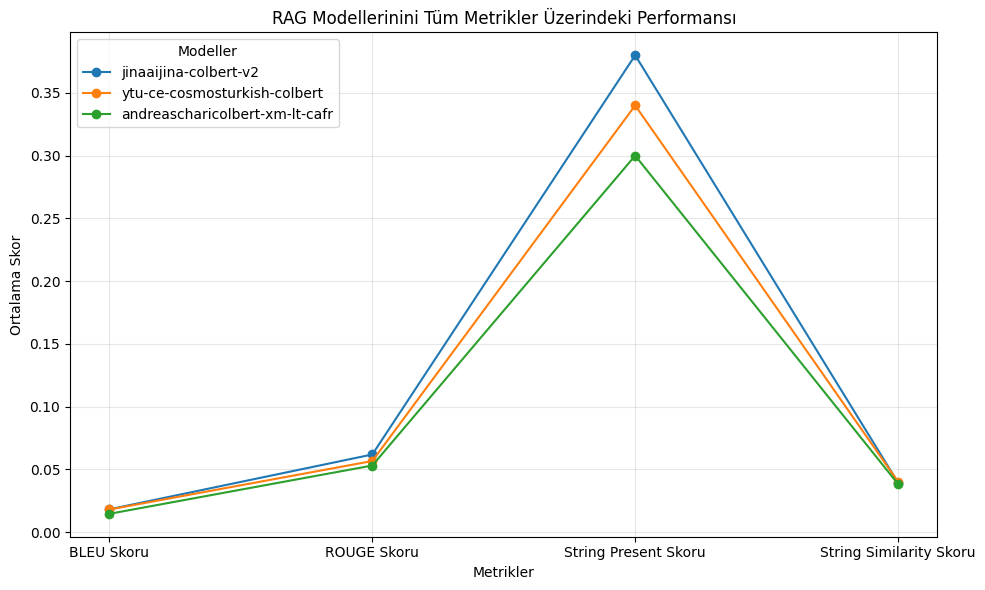

In [8]:
import matplotlib.pyplot as plt

def plot_metrics_by_models(scores):
    metrics = ["bleu", "rouge", "string_present", "string_similarity"]
    metric_labels = ["BLEU Skoru", "ROUGE Skoru", "String Present Skoru", "String Similarity Skoru"]

    plt.figure(figsize=(10, 6))

    for model in scores["model"]:
        model_scores = [scores[metric][scores["model"].index(model)] for metric in metrics]
        plt.plot(metric_labels, model_scores, marker='o', label=model)

    plt.title("RAG Modellerinini Tüm Metrikler Üzerindeki Performansı")
    plt.ylabel("Ortalama Skor")
    plt.xlabel("Metrikler")
    plt.legend(title="Modeller")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Örnek çağrı
plot_metrics_by_models(scores)